# Matrices

In [2]:
from sympy import *
import sympy
init_printing() # Pretty printing

### Make a Matrix

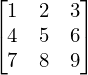

In [3]:
A = Matrix([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
A


### Immediately want reduced-row-echelon-form?

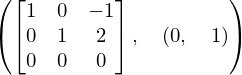

In [4]:
A.rref() # As simple as that!

$$
\mathbf{Dx}=\mathbf{b} 
\quad
\Rightarrow
\quad
\mathbf{x} = \mathbf{D^{-1}b}
$$

In [6]:
D = Matrix([
    [1,2,-1],
    [2,-1,-1],
    [-1,-1,3]
])
b = Matrix([5,0,8])
D.inv()*b

## Now with row-reductions:

### Invert a Matrix to Solve 
$$
\mathbf{Ax}=\mathbf{b} \quad \Rightarrow \quad 
\mathbf{x}=\mathbf{A^{-1}b}
$$

### Symbolic Matrices

### Piecewise Row-Reduction

### Access Rows/Columns at a Time

In [28]:
#import inspect
#from pprint import pprint
#attributes = inspect.getmembers(sympy.Matrix, lambda a:not(inspect.isroutine(a)))
#pprint(attributes)